<a href="https://colab.research.google.com/github/FarrelAD/Calculate-Subsidy-With-Fuzzy-Logic/blob/main/mamdani/mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Library

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Define Fuzzy Variables

In [4]:
land_area = ctrl.Antecedent(np.arange(0, 5, 0.1), 'land_area')
rice_production = ctrl.Antecedent(np.arange(2, 7, 0.1), 'rice_production')
subsidy = ctrl.Consequent(np.arange(1, 6, 0.1), 'subsidy')

# Define Fuzzy Memberships

In [23]:
land_area['small'] = fuzz.trimf(land_area.universe, [0, 1, 2])
land_area['medium'] = fuzz.trimf(land_area.universe, [2, 2, 3])
land_area['large'] = fuzz.trimf(land_area.universe, [2, 3, 4])

rice_production['low'] = fuzz.trimf(rice_production.universe, [2, 3, 4])
rice_production['medium'] = fuzz.trimf(rice_production.universe, [3, 4, 5])
rice_production['high'] = fuzz.trimf(rice_production.universe, [4, 5, 6])

subsidy['low'] = fuzz.trimf(subsidy.universe, [1, 2, 3])
subsidy['medium'] = fuzz.trimf(subsidy.universe, [2, 3, 4])
subsidy['high'] = fuzz.trimf(subsidy.universe, [3, 4, 5])

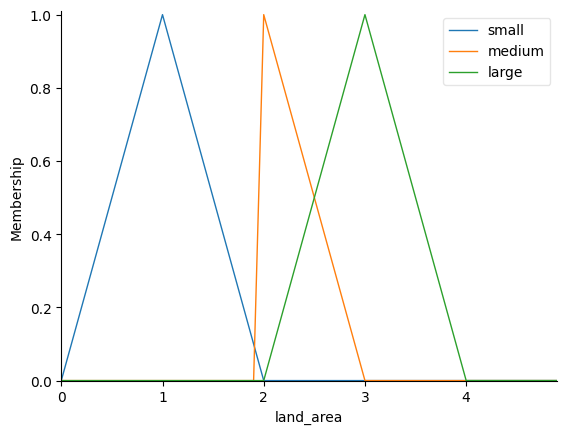

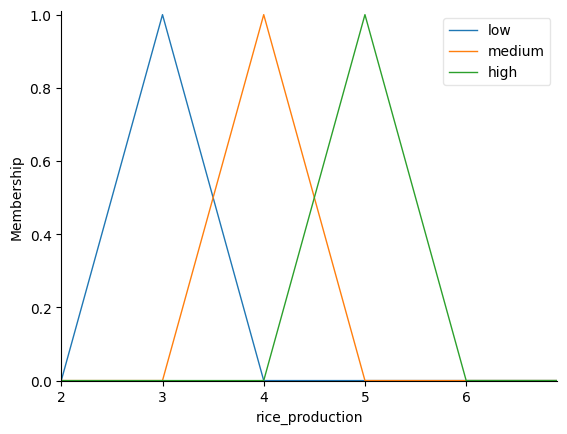

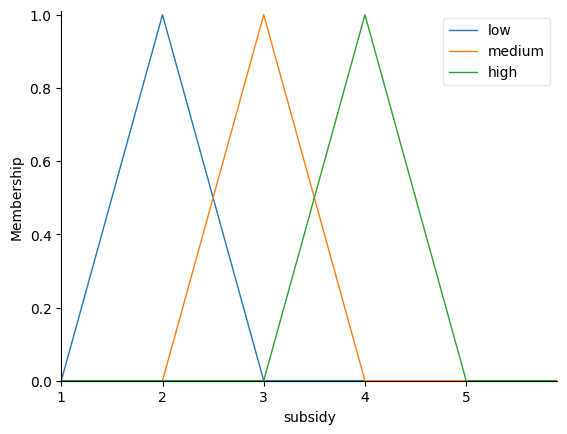

In [24]:
land_area.view()
rice_production.view()
subsidy.view()

# Define Fuzzy Rules

In [25]:
rule1 = ctrl.Rule(land_area['small'] & rice_production['low'], subsidy['high'])
rule2 = ctrl.Rule(land_area['small'] & rice_production['medium'], subsidy['medium'])
rule3 = ctrl.Rule(land_area['small'] & rice_production['high'], subsidy['low'])
rule4 = ctrl.Rule(land_area['medium'] & rice_production['low'], subsidy['high'])
rule5 = ctrl.Rule(land_area['medium'] & rice_production['medium'], subsidy['medium'])
rule6 = ctrl.Rule(land_area['medium'] & rice_production['high'], subsidy['low'])
rule7 = ctrl.Rule(land_area['large'] & rice_production['low'], subsidy['medium'])
rule8 = ctrl.Rule(land_area['large'] & rice_production['medium'], subsidy['low'])
rule9 = ctrl.Rule(land_area['large'] & rice_production['high'], subsidy['low'])

# Create Control System

In [26]:
subsidy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
subsidization = ctrl.ControlSystemSimulation(subsidy_ctrl)

# Input Values

In [27]:
subsidization.input['land_area'] = 3.2
subsidization.input['rice_production'] = 5

# Compute the result

In [28]:
subsidization.compute()

# Visualizing Defuzzification Process

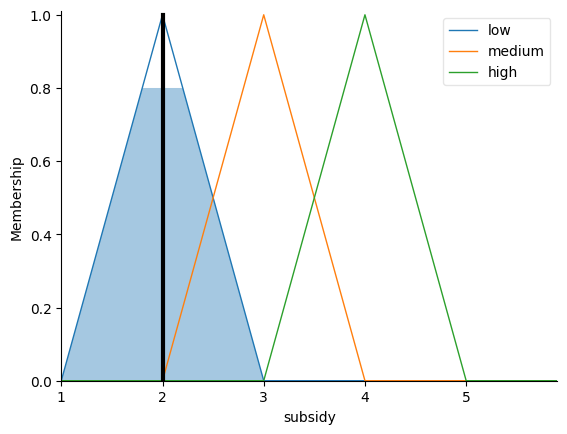

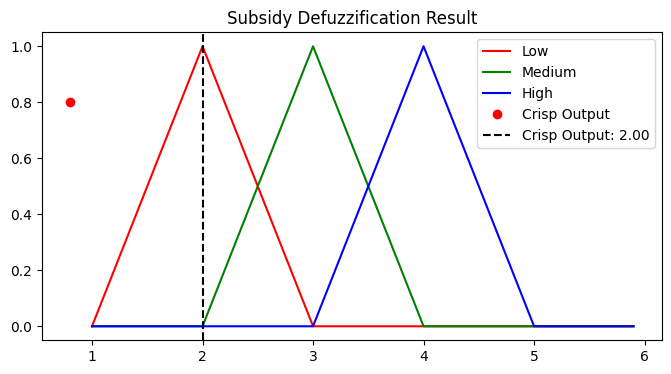

In [30]:
subsidy.view(sim=subsidization)

if 'subsidy' in subsidization.output:
    subsidy_activation = subsidization.output['subsidy']

    subsidy_activation = subsidization.output['subsidy']

    # Plotting the output fuzzy set with crisp result
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(subsidy.universe, subsidy['low'].mf, 'r', label='Low')
    ax.plot(subsidy.universe, subsidy['medium'].mf, 'g', label='Medium')
    ax.plot(subsidy.universe, subsidy['high'].mf, 'b', label='High')
    ax.axvline(x=subsidy_activation, color='k', linestyle='--', label=f"Crisp Output: {subsidy_activation:.2f}")
    ax.set_title('Subsidy Defuzzification Result')
    ax.legend()
    plt.show()
else:
  print("No valid output computed! Adjust input values or rules.")
